# Part 1: Small world networks
## Exercises 1
* What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?

The random network model underestimates the size and the frequency of the high degree nodes, as well as the number of low degree nodes. Instead the random network model predicts a larger number of nodes in the vicinity of ‹k› than seen in real networks.


* List the four regimes that characterize random networks as a function of ⟨k⟩
1. Subcritical Regime: 0 ‹ ‹k› ‹ 1 (p ‹ 1/N）

2. Critical Point: ‹k› = 1 (p = 1/N )

3. Supercritical Regime: ‹k› › 1 (p › 1/N)

4. Connected Regime: ‹k› › lnN (p › lnN/N)


* According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?


For random networks the average clustering coefficient decreases as $N^{-1}$. $C{_i}=p=\frac{⟨k⟩}{N}$.

In contrast, for real networks ‹C› of directed networks appears to be independent of N, C(k) decreases with the node degrees.

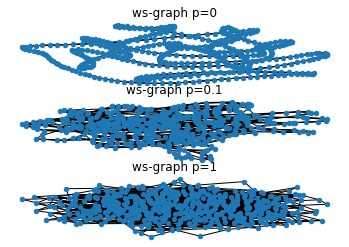

In [58]:
import networkx as nx
import matplotlib.pyplot as plt

WSG1=nx.watts_strogatz_graph(500,4,0)
WSG2=nx.watts_strogatz_graph(500,4,0.1)
WSG3=nx.watts_strogatz_graph(500,4,1)

plt.subplot(311)
plt.title('ws-graph p=0')
nx.draw(WSG1,node_size=20)
plt.subplot(312)
plt.title('ws-graph p=0.1')
nx.draw(WSG2,node_size=20)
plt.subplot(313)
plt.title('ws-graph p=1')
nx.draw(WSG3,node_size=20)

## Exercises 2 : WS edition

**1.Calculate the average shortest path length ⟨d⟩ for each one. Describe what happens to the network when p=1.**

As p decreases to 1, ⟨d⟩ is now around 4.8, which means the averager shortest path is shorter than before.


In [14]:
d1=nx.average_shortest_path_length(WSG1)

In [15]:
d1

62.875751503006015

In [17]:
d2=nx.average_shortest_path_length(WSG2)

In [18]:
d2

7.29498997995992

In [19]:
d3=nx.average_shortest_path_length(WSG3)

In [20]:
d3

4.798725450901804

**2.Generate a lot of networks with different values of p. You will notice that paths are short when p is close to one and they are long when p=0. What's the value of p for which the average shortest path length gets close to the short paths we find in a fully randomized network.**


In [44]:
import math
import numpy as np

ave_path=[]
std_arr=[]

p_arr=[0,0.01,0.03,0.05,0.1,0.2]
for p in p_arr:
    path=[]
    for i in range(50):
        WSG=nx.watts_strogatz_graph(500,4,p)
        shortest_path=nx.average_shortest_path_length(WSG)
        path.append(shortest_path)
    ave_path.append(np.average(path))
    std_arr.append(np.std(path))

In [45]:
ave_path,std_arr

([62.87575150300602,
  23.32691959919839,
  13.066015070140283,
  10.434153587174348,
  7.6168105811623255,
  6.097319759519038],
 [7.105427357601002e-15,
  4.374668223563132,
  1.4045793401814672,
  0.7153380080176907,
  0.2797623297830792,
  0.11642312475794185])

Text(0.5, 0, 'p')

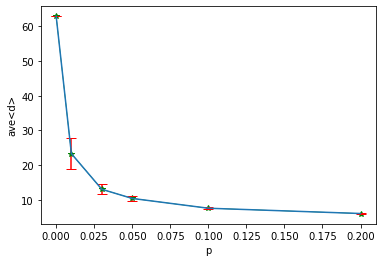

In [56]:
plt.plot(p_arr,ave_path,color='green',linewidth=0.6,linestyle='-',marker='*')
plt.errorbar(p_arr,ave_path,yerr=std_arr,ecolor='red',capsize=5)
plt.ylabel('ave<d>')
plt.xlabel('p')

# Part 2: Scale-free networks
## Exercises1: BA edition.

* What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).
* What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one

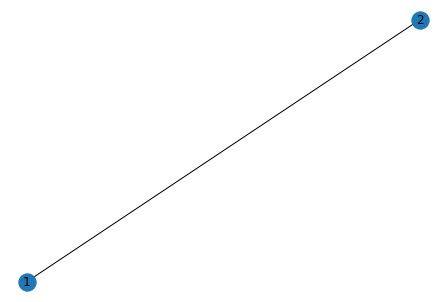

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
 
G = nx.Graph()

G.add_nodes_from([1,2])
G.add_edge(1,2)
 
nx.draw(G,with_labels=True)

In [6]:
# selecting a node with probability proportional to it's degree.
for node in range(3,101):
#     generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information)
    flatten_nodes = list(sum(G.edges, ()))
    random_node = random.choice(flatten_nodes)
    G.add_edge(node,random_node)

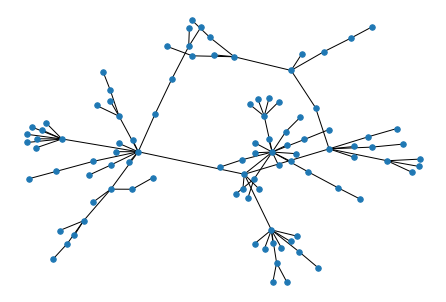

In [10]:
nx.draw(G,node_size=30)

In [11]:
for node in range(101,5001):
#     generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information)
    flatten_nodes = list(sum(G.edges, ()))
    random_node = random.choice(flatten_nodes)
    G.add_edge(node,random_node)

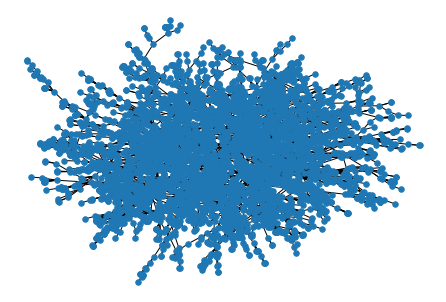

In [12]:
nx.draw(G,node_size=30)

In [103]:
# max(dict(G.degree()).values()),min(dict(G.degree()).values())
degree = np.array([G.degree(n) for n in G.nodes()])
max_degree = np.max(degree)
min_degree = np.min(degree)
print('the maximum degree is:',max_degree)
print('the minimum degree is:',min_degree)

the maximum degree is: 118
the minimum degree is: 1


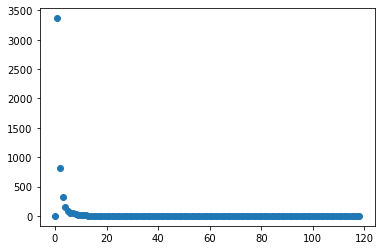

In [25]:
# degree=nx.degree_histogram(G)
# degree_freq=[de/float(sum(degree)) for de in degree]
plt.scatter(range(len(degree)), nx.degree_histogram(G))

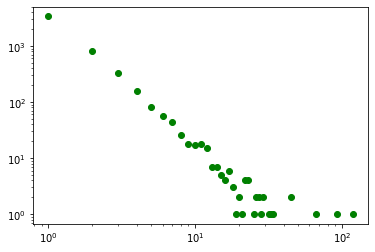

In [27]:
plt.loglog(range(len(degree)), nx.degree_histogram(G),'go')

**Friendship paradox. This paradox states that almost everyone has fewer friends than their friends have, on average*.**

In [90]:
somebody = random.choice(list(G.nodes()))
G.degree(somebody)

3

In [91]:
total_degree = 0
for friend in list(G.neighbors(somebody)):
    print(G.degree(friend))
    total_degree += G.degree(friend)
total_degree/G.degree(somebody)

25
1
1


9.0

In [101]:
times = 0
for i in range(1000):
    somebody = random.choice(list(G.nodes()))
    mine_friend = G.degree(somebody)
    
    total_degree = 0
    for friend in list(G.neighbors(somebody)):
        total_degree += G.degree(friend)
    friends_of_friends = total_degree/G.degree(somebody)
    
    if mine_friend < friends_of_friends:
        times+=1

print(str(times)+' times out of those 1000 times is the friendship paradox true')

860 times out of those 1000 times is the friendship paradox true


In [106]:
k = np.mean(degree)
P = k/(5000-1)
G_ER = nx.fast_gnp_random_graph(5000,P)

Text(0, 0.5, 'number of nodes')

<Figure size 432x288 with 0 Axes>

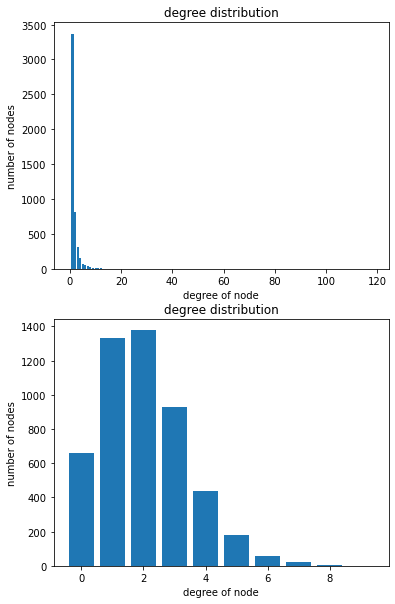

In [114]:
plt.subplots_adjust(wspace=1)
plt.figure(figsize=(6, 10)) 

plt.subplot(211)
degree = nx.degree_histogram(G)
plt.bar(range(len(degree)), degree)
plt.title("degree distribution")
plt.xlabel("degree of node")
plt.ylabel("number of nodes")

plt.subplot(212)
degree_ER = nx.degree_histogram(G_ER)
plt.bar(range(len(degree_ER)), degree_ER)
plt.title("degree distribution")
plt.xlabel("degree of node")
plt.ylabel("number of nodes")